In [76]:
import pandas as pd
df=pd.DataFrame()

In [77]:
df=pd.read_csv('shanichar bazar.csv', index_col='date',parse_dates=True)

<ipython-input-77-e8bad82f5f25>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('shanichar bazar.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

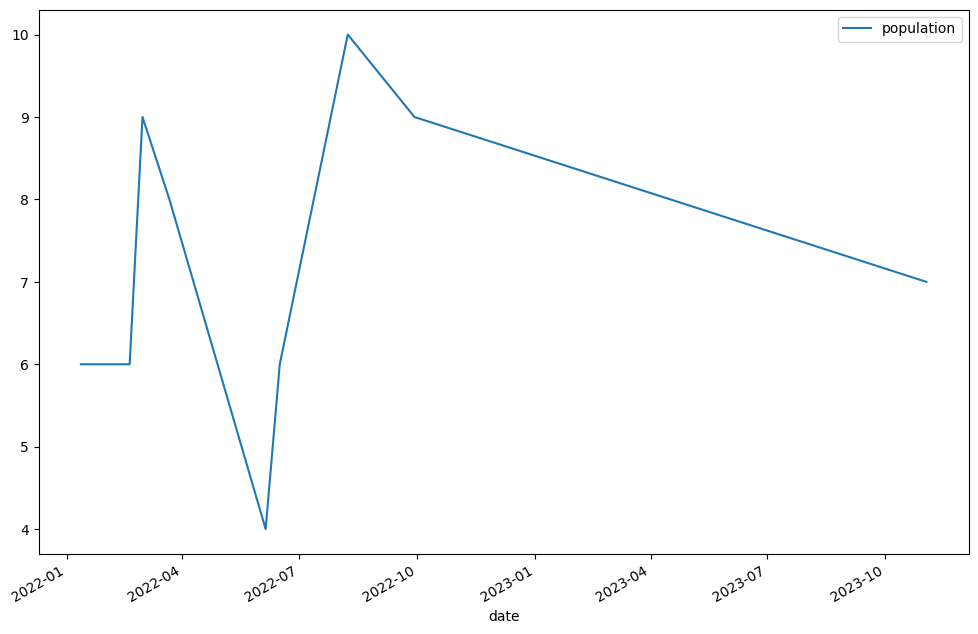

In [78]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [79]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-03-01,9,NaN,NaN,NaN
2022-02-19,6,9.0,NaN,NaN
2022-03-22,8,6.0,9.0,NaN
2022-06-05,4,8.0,6.0,9.0
2022-06-16,6,4.0,8.0,6.0
2022-08-08,10,6.0,4.0,8.0
2022-09-29,9,10.0,6.0,4.0
2022-01-12,6,9.0,10.0,6.0
2023-11-02,7,6.0,9.0,10.0


In [80]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-06-05,4,8.0,6.0,9.0
2022-06-16,6,4.0,8.0,6.0
2022-08-08,10,6.0,4.0,8.0
2022-09-29,9,10.0,6.0,4.0
2022-01-12,6,9.0,10.0,6.0
2023-11-02,7,6.0,9.0,10.0


In [81]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [82]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [83]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 8.  6.  9.]
 [ 4.  8.  6.]
 [ 6.  4.  8.]
 [10.  6.  4.]
 [ 9. 10.  6.]
 [ 6.  9. 10.]]


In [84]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(5, 3)
(5, 1)


In [85]:
lin_model.fit(X_train,y_train)

LinearRegression()

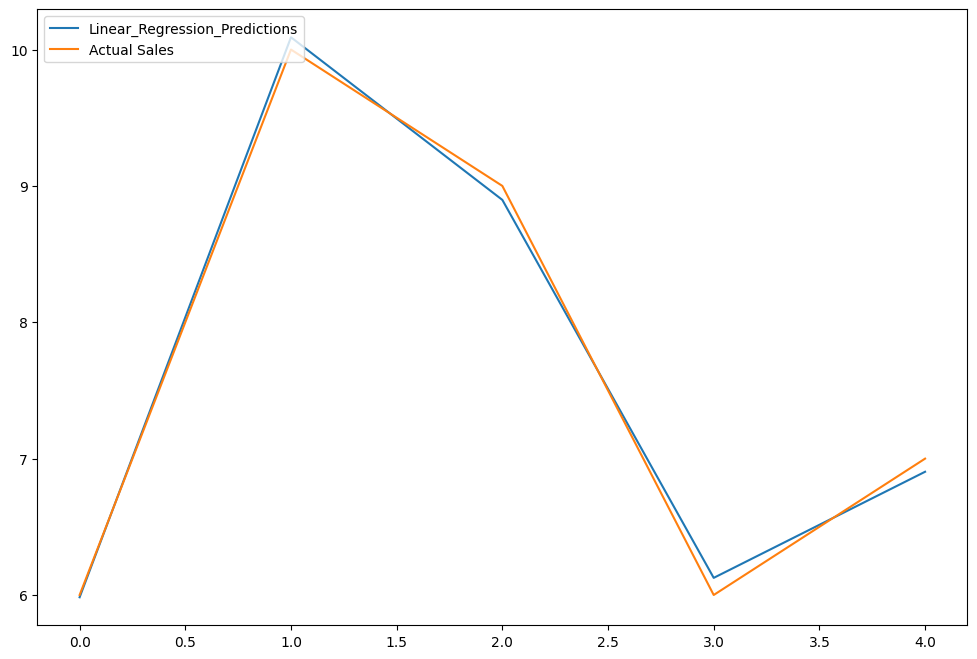

In [86]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [88]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 0.09377429894471226
